**Import Data**

In [2]:
# import appropriate packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# read the excel file
# had to install the xlrd package to read the file 
df = pd.read_csv("../csv_files/p1no_skewx.csv", index_col=0)
df.head(10)

,C1,C4,C5p,C6p,C7,T3p,T4p,T5p,S1p,S2p,S3p,C2,C3p
0,0.458312,0.630418,0.471242,0.788811,0.278285,0.617569,0.534307,0.567375,0.462525,0.532463,0.478776,1.0,0
1,1.000000,0.384735,1.000000,0.000000,0.197644,0.521720,0.545709,0.489104,0.271483,0.667685,0.474754,0.0,1
2,0.327366,0.582011,0.406077,0.000000,0.105035,0.622040,0.524798,0.773408,1.000000,0.324790,0.514761,1.0,1
3,0.814322,0.578004,0.396940,0.000000,0.112988,0.694834,0.268780,0.769738,1.000000,0.386674,0.660248,1.0,1
4,0.286445,0.259982,0.453073,0.529150,0.977212,0.424900,0.394649,0.411101,0.420367,0.592646,0.504014,1.0,0
5,0.343734,0.128754,0.716008,0.000000,0.546205,0.000000,0.541451,0.321440,0.293531,0.258266,0.412542,1.0,0
6,0.482864,0.485828,0.418442,0.000000,0.087527,0.396441,0.864218,0.294423,0.501419,0.357093,0.299493,1.0,1
7,0.331458,0.697278,0.281373,0.000000,0.395882,0.493900,1.000000,0.000000,0.465449,0.638208,0.474152,0.0,1
8,0.368286,0.292288,0.596549,0.000000,0.649777,0.617450,0.270594,0.777288,0.349176,0.473739,0.848390,1.0,1
9,0.392839,0.317715,0.364952,0.000000,0.863750,0.416342,0.202002,0.457758,0.934464,0.578890,0.870921,1.0,0


In [5]:
# read in dfy 
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,10.0,9.5,8.5,11.870000,9.0,0,1
1,8.0,10.0,8.0,7.250000,9.0,1,0
2,7.0,14.0,12.0,6.700000,13.0,1,0
3,11.5,16.0,14.0,12.390000,15.0,1,1
4,21.0,21.0,19.0,56.599998,20.0,0,1


In [6]:
# filter out Y1 and Y2 (our targets)
dfy = dfy.filter(['Y1', 'Y2'])
dfy.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [7]:
# concat Y variables with dfx dataframe
df = pd.concat([df, dfy], axis=1)
df.head()

,C1,C4,C5p,C6p,C7,T3p,T4p,T5p,S1p,S2p,S3p,C2,C3p,Y1,Y2
0,0.458312,0.630418,0.471242,0.788811,0.278285,0.617569,0.534307,0.567375,0.462525,0.532463,0.478776,1.0,0,0,1
1,1.000000,0.384735,1.000000,0.000000,0.197644,0.521720,0.545709,0.489104,0.271483,0.667685,0.474754,0.0,1,1,0
2,0.327366,0.582011,0.406077,0.000000,0.105035,0.622040,0.524798,0.773408,1.000000,0.324790,0.514761,1.0,1,1,0
3,0.814322,0.578004,0.396940,0.000000,0.112988,0.694834,0.268780,0.769738,1.000000,0.386674,0.660248,1.0,1,1,1
4,0.286445,0.259982,0.453073,0.529150,0.977212,0.424900,0.394649,0.411101,0.420367,0.592646,0.504014,1.0,0,0,1


**Correlation**

In [8]:
#Want to see the correlation of every variable using the Spearman method 
df.corr(method='spearman')

,C1,C4,C5p,C6p,C7,T3p,T4p,T5p,S1p,S2p,S3p,C2,C3p,Y1,Y2
C1,1.000000,0.092400,0.015515,-0.048313,0.068659,-0.057312,0.048889,0.045254,0.026317,0.043205,-0.033059,-0.001053,-0.013174,0.047553,-0.010756
C4,0.092400,1.000000,-0.046360,0.090759,0.012783,0.051942,0.083137,0.052436,0.000562,0.000653,0.035803,-0.031415,0.011217,-0.068960,0.097814
C5p,0.015515,-0.046360,1.000000,0.123038,-0.050660,0.105756,0.110441,0.128499,-0.005754,-0.061479,0.069945,0.144724,0.016453,-0.057338,0.068568
C6p,-0.048313,0.090759,0.123038,1.000000,-0.002239,-0.029124,-0.022850,-0.084690,-0.075863,-0.117002,-0.032080,0.112737,-0.103513,-0.743819,0.282056
C7,0.068659,0.012783,-0.050660,-0.002239,1.000000,-0.195056,0.131785,-0.179674,0.081062,0.175953,-0.161542,0.210654,-0.341172,-0.037638,-0.034718
T3p,-0.057312,0.051942,0.105756,-0.029124,-0.195056,1.000000,-0.130606,0.455377,0.180629,0.074871,0.370785,0.013109,0.135053,0.114179,-0.007145
T4p,0.048889,0.083137,0.110441,-0.022850,0.131785,-0.130606,1.000000,-0.113673,0.054729,-0.042660,-0.105395,0.049199,-0.053656,0.074462,-0.014966
T5p,0.045254,0.052436,0.128499,-0.084690,-0.179674,0.455377,-0.113673,1.000000,0.175189,0.154306,0.406940,0.122586,0.233877,0.126872,0.028644
S1p,0.026317,0.000562,-0.005754,-0.075863,0.081062,0.180629,0.054729,0.175189,1.000000,0.131003,0.200970,0.064414,-0.060916,0.097515,-0.049602
S2p,0.043205,0.000653,-0.061479,-0.117002,0.175953,0.074871,-0.042660,0.154306,0.131003,1.000000,0.137167,0.026119,0.055763,0.165567,-0.096874


In [9]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_1 = df.corr(method='spearman')['Y1'] > 0.5
Target_1

C1     False
C4     False
C5p    False
C6p    False
C7     False
T3p    False
T4p    False
T5p    False
S1p    False
S2p    False
S3p    False
C2     False
C3p    False
Y1      True
Y2     False
Name: Y1, dtype: bool

In [10]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_2 = df.corr(method='spearman')['Y2'] > 0.5
Target_2

C1     False
C4     False
C5p    False
C6p    False
C7     False
T3p    False
T4p    False
T5p    False
S1p    False
S2p    False
S3p    False
C2     False
C3p    False
Y1     False
Y2      True
Name: Y2, dtype: bool

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

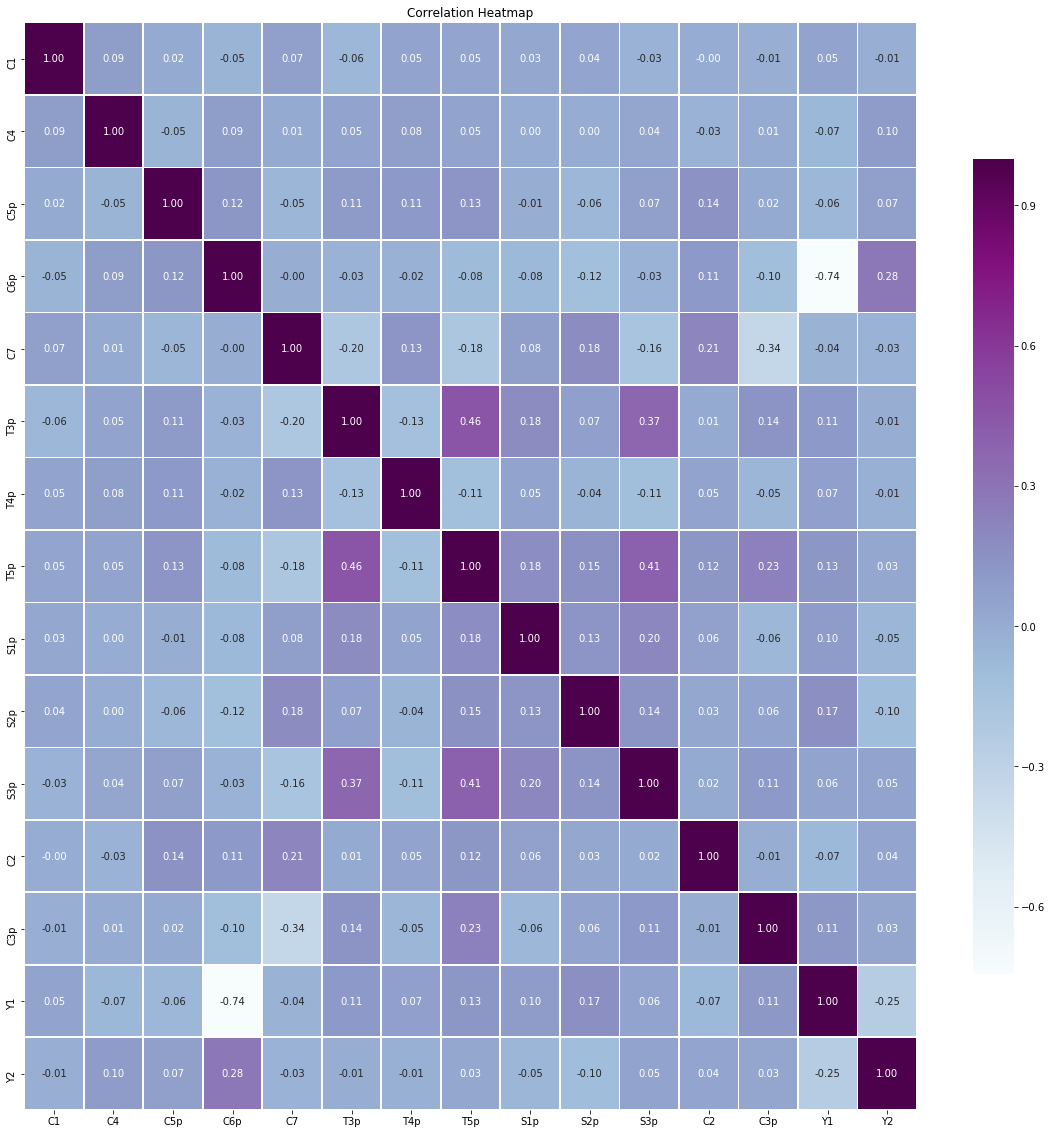

In [11]:
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

In [12]:
df.to_csv('../csv_files/p1correlation.csv')